# Aprendizaje no supervisado

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
 markers = ('o', 's', '^', 'v', '<')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])

 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 lab = lab.reshape(xx1.shape)
 plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())

 for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=X[y == cl, 0],
  y=X[y == cl, 1],
  alpha=0.8,
  c=colors[idx],
  marker=markers[idx],
  label=f'Class {cl}',
  edgecolor='black')

## Reducción de la dimensionalidad

"Así como cuando se seleccionan variables, se pueden utilizar diferentes técnicas de extracción de variables para reducir el número de estas en el dataset. La diferencia entre feature selection y feature extraction es que mientras en el primero se mantienen las variables originales, en el segundo se transforman o se proyectan las variables sobre un nuevo espacio.

En el contexto de la reducción de la dimensionalidad, la extracción de variables se entiende como una compresión de los datos con el objetivo de obtener la mayor cantidad de información relevante. Esto puede ayudar a mejorar la predicción  ya que se reduce la maldición de la dimensionalidad." (Raschka, 2022)



### PCA (Análisis de componentes principales)

PCA apunta a encontrar las direcciones de máxima varianza en un espacio de alta dimensionalidad para proyectarla sobre un subespacio con iguales o menores dimensiones.

1. Estandarizar las variables.
2. Construir la matriz de varianzas y covarianzas.
3. Descomponer la matriz de varianzas y covarianzas en vectores y valores propios.
4. Seleccionar los $k$ vectores propios que correspondan a los $k$ valores propios más grandes.
5. Construir la matriz de proyección $W$.
6. Transformar los datos iniciales $X$, utilizando la matriz de proyección $W$, para obtener el nuevo subespacio.

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = load_iris()['data']
y = load_iris()['target']

In [ ]:
np.unique(y)

array([0, 1, 2])

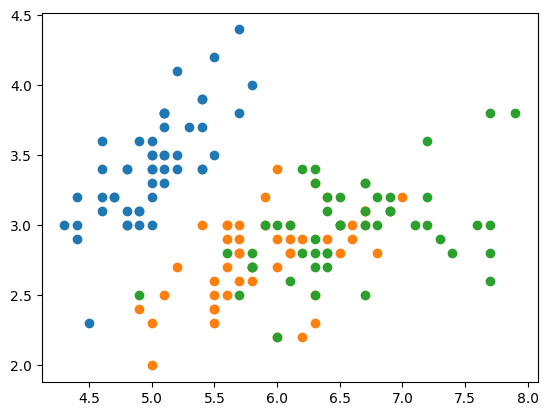

In [ ]:
for value in np.unique(y):
  plt.scatter(X[:, 0][y == value], X[:, 1][y == value])

plt.show()

In [ ]:
# estandarización
X_std = (X - X.mean(axis=0)) / np.std(X, axis=0)

In [ ]:
# varianzas y covarianzas
cov_mat = np.cov(X_std.T)

In [ ]:
# descomposición de la varianza
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [ ]:
eig_val

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
# ratio de la varianza
tot = sum(eig_val)
var_exp = [(i/tot) for i in sorted(eig_val, reverse=True)]
var_exp

[0.7296244541329989,
 0.22850761786701754,
 0.03668921889282865,
 0.005178709107154905]

In [ ]:
# varianza acumulada
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

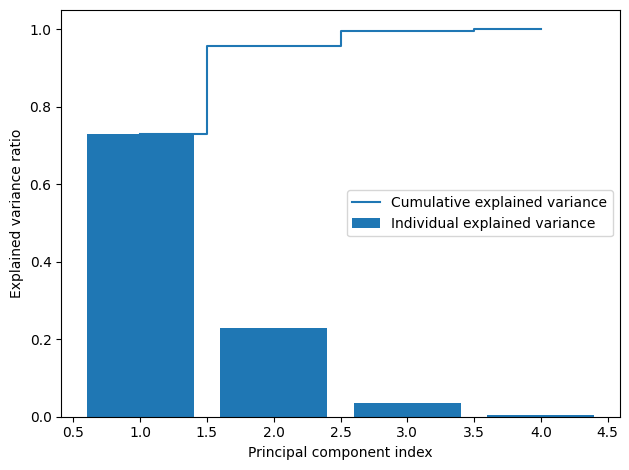

In [ ]:
plt.bar(range(1, 5), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel("Principal component index")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# matriz de proyección
W = eig_vec[:, :2]
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [ ]:
# dataset proyectado
X_pca = X_std.dot(W)

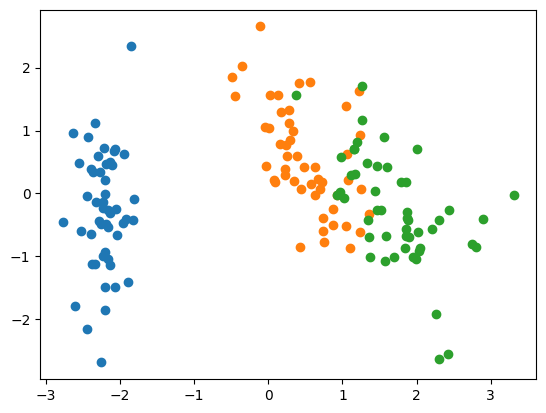

In [ ]:
for value in np.unique(y):
  plt.scatter(X_pca[:, 0][y == value], X_pca[:, 1][y == value])

plt.show()

### PCA en sklearn

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scal = scaler.fit_transform(X)
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X_scal)
X_pca

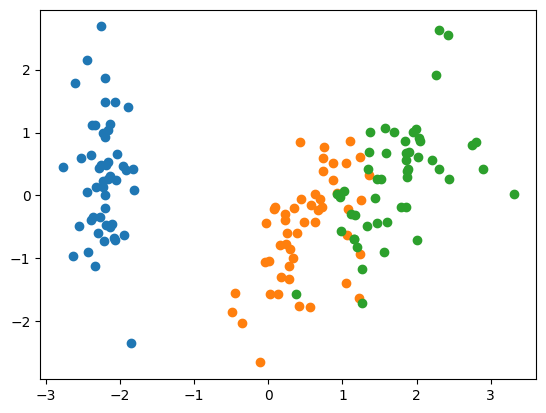

In [ ]:
for value in np.unique(y):
  plt.scatter(X_pca[:, 0][y == value], X_pca[:, 1][y == value])

plt.show()

### Modelando con escalamiento, PCA y regresión logística

$$\text{logit}(p)=\log\frac{p}{(1-p)}$$

$$\text{logit}(p)=\sum_{i=1}^n w_ix_i+b$$

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

$$z = \text{w}^T\text{x}+ b$$

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

#### Escalamiento

In [ ]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

#### Reducción de la dimensionalidad

In [ ]:
pca = PCA(n_components=None)
x_pca_train = pca.fit_transform(X_train_scal)
x_pca_test = pca.transform(X_test_scal)
pca.explained_variance_ratio_

array([0.72386681, 0.2363119 , 0.03512152, 0.00469977])

In [ ]:
pca = PCA(n_components=2)
x_pca_train = pca.fit_transform(X_train_scal)
x_pca_test = pca.transform(X_test_scal)

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

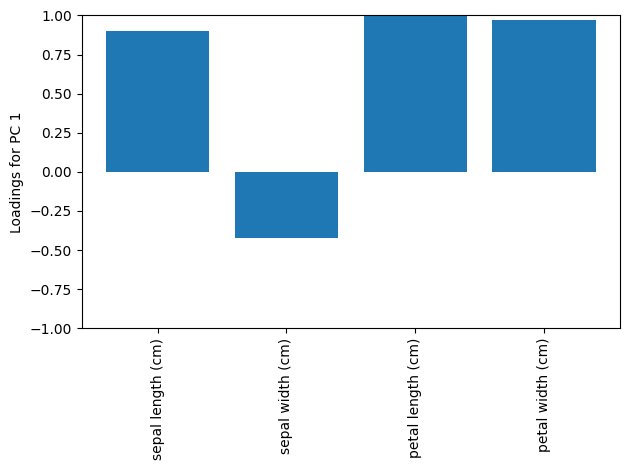

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(4), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(4))
ax.set_xticklabels(load_iris()['feature_names'], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

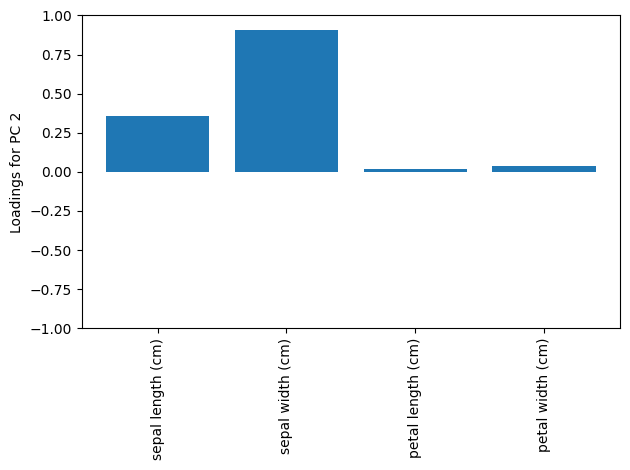

In [ ]:
fig, ax = plt.subplots()
ax.bar(range(4), loadings[:, 1], align='center')
ax.set_ylabel('Loadings for PC 2')
ax.set_xticks(range(4))
ax.set_xticklabels(load_iris()['feature_names'], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

#### Modelamiento

In [ ]:
lr = LogisticRegression(penalty=None)
lr.fit(x_pca_train, y_train)
y_pred = lr.predict(x_pca_test)

#### Evaluación del modelo

<Axes: >

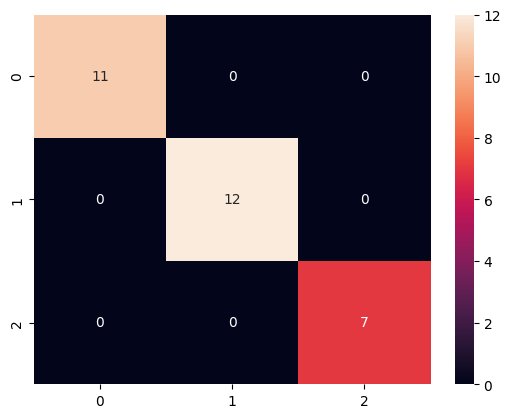

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

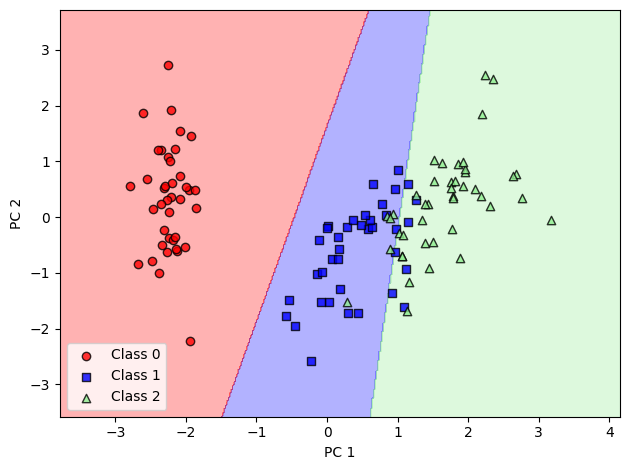

In [ ]:
plot_decision_regions(x_pca_train, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

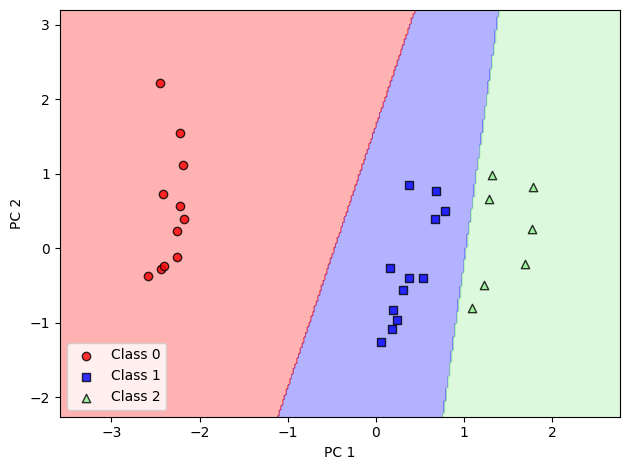

In [ ]:
plot_decision_regions(x_pca_test, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Creando un pipeline

In [ ]:
from sklearn.pipeline import Pipeline

$$scaler \rightarrow pca \rightarrow lr$$

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('lr', LogisticRegression(penalty=None))])

In [ ]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('lr', LogisticRegression(penalty=None))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('lr', LogisticRegression(penalty=None))])

In [ ]:
y_pred = pipe.predict(X_test)

<Axes: >

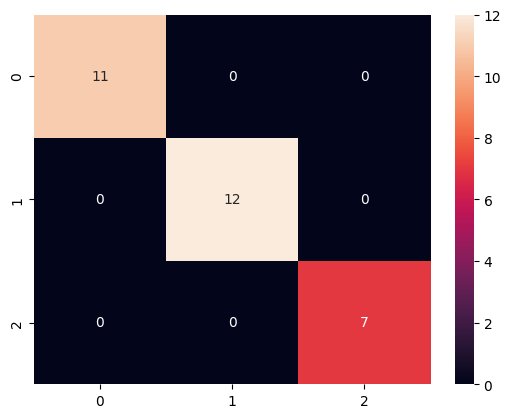

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)

## Clustering

"Otra de las categorías del aprendizaje no supervisado es permitirnos descrubir estructuras escondidas en los datos donde no se posee un label con antelación. El objetivo del clustering es encontrar un agrupamiento natural en los datos de tal manera que los items en cada cluster sean similares entre sí y que sean diferentes a los de los otros clusters." (Raschka, 2022)

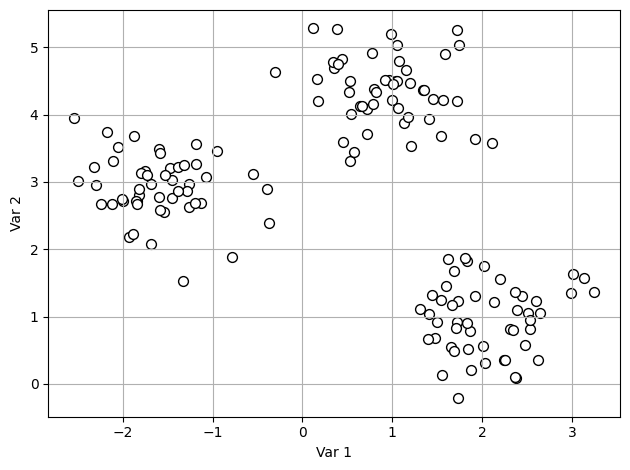

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=150,
  n_features=2,
  centers=3,
  cluster_std=0.5,
  shuffle=True,
  random_state=0)
plt.scatter(X[:, 0],
  X[:, 1],
  c='white',
  marker='o',
  edgecolor='black',
  s=50)
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.grid()
plt.tight_layout()
plt.show()

#### K-Means

1. Selección aleatoria de $k$ centroides de los datos iniciales.
2. Asignar a dato el centroide más cercano.
3. Mover los centroides al centro de los datos asignados.
4. Repetir los pasos 2 y 3 hasta que converja.

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
  init='random',
  n_init=10,
  max_iter=300,
  tol=1e-04,
  random_state=0)
y_km = km.fit_predict(X)

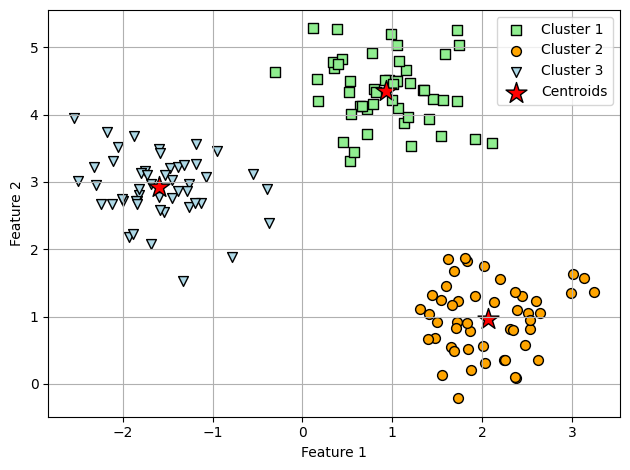

In [ ]:
plt.scatter(X[y_km == 0, 0],
  X[y_km == 0, 1],
  s=50, c='lightgreen',
  marker='s', edgecolor='black',
  label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
  X[y_km == 1, 1],
  s=50, c='orange',
  marker='o', edgecolor='black',
  label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
  X[y_km == 2, 1],
  s=50, c='lightblue',
  marker='v', edgecolor='black',
  label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
  km.cluster_centers_[:, 1],
  s=250, marker='*',
  c='red', edgecolor='black',
  label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Para seleccionar el mejor número de clusters, se pueden utilizar diferentes métricas. Estas son algunas de las más comunes:

1. Davies Bouldin score
2. Silhoutte score
3. Homogeneity score

In [ ]:
# implementación de Davies Bouldin score

from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

db_scores = []
for i in range(2, 20):

  km = KMeans(n_clusters=i,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0).fit(X)
  score = davies_bouldin_score(X, km.labels_)
  db_scores.append(score)

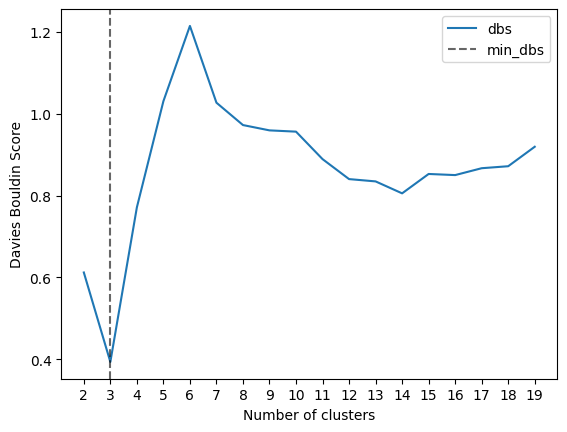

In [ ]:
plt.plot(range(2, 20), db_scores, label='dbs')
plt.axvline(3, ls='--', color='k', label='min_dbs', alpha=0.6)
plt.xticks(range(2, 20))
plt.xlabel("Number of clusters")
plt.ylabel("Davies Bouldin Score")
plt.legend()
plt.show()

#### Clustering jerárquico

Existen dos enfoques para el clústering jerárquico: aglomerativo y divisivo. En el primero, todos los datos son un gran cluster y empezamos a dividir en clusters más pequeños hasta llegar a que cada cluster contiene solo un dato.

En el segundo, el enfoque es al revés. Cada clúster en el principio contiene solo un dato y empezamos a juntar los datos buscando aquel dato que se encuentre más cerca.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df


,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(
  pdist(df, metric='euclidean')),
  columns=labels, index=labels)
row_dist #matriz de distancias

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [ ]:
row_clusters = linkage(df.values, # asociación a partir de las distancias
  method='complete',
  metric='euclidean')

In [ ]:
pd.DataFrame(row_clusters,
  columns=['row label 1',
  'row label 2',
  'distance',
  'no. of items in clust.'],
  index=[f'cluster {(i + 1)}' for i in
  range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


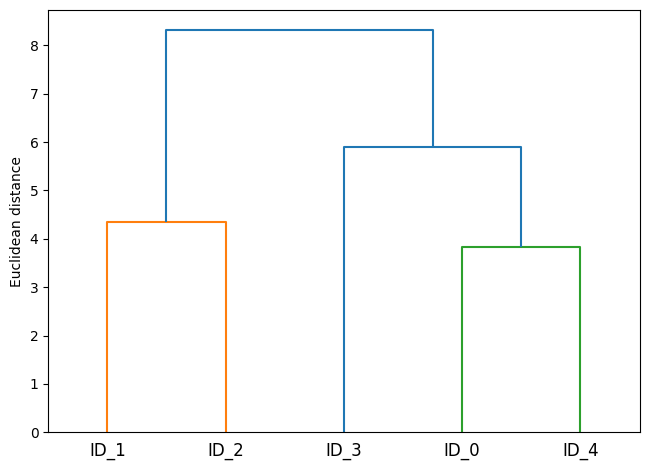

In [ ]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(
  row_clusters,
  labels=labels,)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

<ipython-input-169-19e71f7256c5>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
<ipython-input-169-19e71f7256c5>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


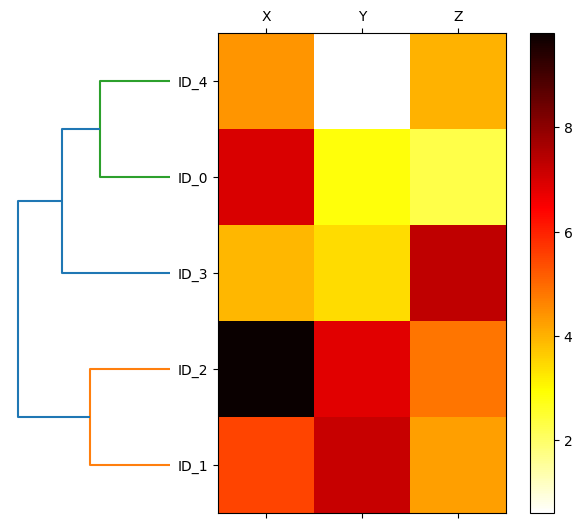

In [ ]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,
  orientation='left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
  interpolation='nearest',
  cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
  i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
affinity='euclidean',
  linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### DBSCAN

A diferencia del K-Means y del cluster aglomerativo, este algoritmo no supone clústers esféricos ni tampoco requiere un punto de corte manual. Este algoritmo está basado en la creación de clústers basados en densidad. La noción de densidad es definida como el número de puntos dentro de un radio específico.

1. Puntos centrales: es considerado un punto central si un número específico de puntos vecinos cae dentro del radio.
2. Puntos límite: es considerado un punto
3. Puntos ruido: todos aquellos puntos que no sean centrales o límite

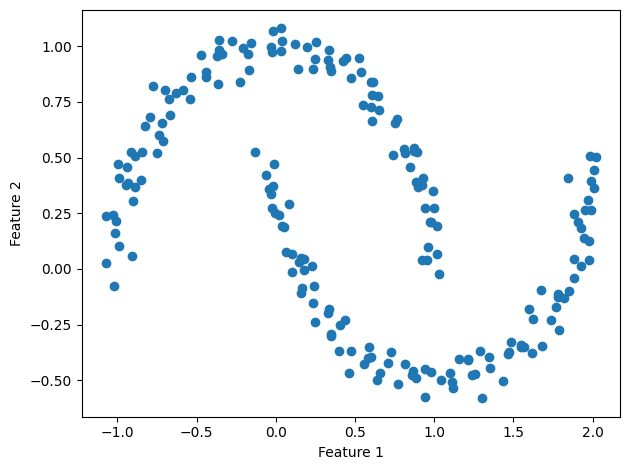

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
  noise=0.05,
  random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


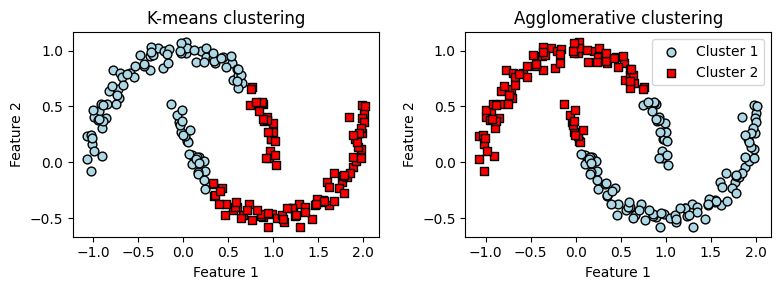

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
  random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
  X[y_km == 0, 1],
  c='lightblue',
  edgecolor='black',
  marker='o',
  s=40,
  label='cluster 1')
ax1.scatter(X[y_km == 1, 0],
  X[y_km == 1, 1],
  c='red',
  edgecolor='black',
  marker='s',
  s=40,
  label='cluster 2')
ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ac = AgglomerativeClustering(n_clusters=2,
  affinity='euclidean',
  linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
  X[y_ac == 0, 1],
  c='lightblue',
  edgecolor='black',
  marker='o',
  s=40,
  label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0],
  X[y_ac == 1, 1],
  c='red',
  edgecolor='black',
  marker='s',
  s=40,
  label='Cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

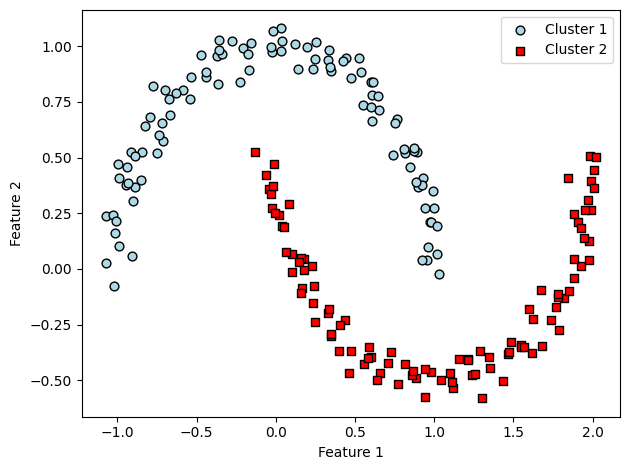

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
  min_samples=5,
  metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
  X[y_db == 0, 1],
  c='lightblue',
  edgecolor='black',
  marker='o',
  s=40,
  label='Cluster 1')
plt.scatter(X[y_db == 1, 0],
  X[y_db == 1, 1],
  c='red',
  edgecolor='black',
  marker='s',
  s=40,
  label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()